generating random data set


In [187]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import random

np.random.seed(42)

def generate_mock_data(num_tasks = 10, num_robots = 5):
    task_durations = np.random.randint(1, 11, size = num_tasks)
    task_priorities = np.random.randint(1, 6, size = num_tasks)
    robot_efficiencies = [0.1,0.01,0.2,0.3,0.4]
    return task_durations, task_priorities, robot_efficiencies


calculating fitness function according to the given fitness function


In [188]:
def claculate_fintness(initial_population, task_durations, task_priorities, robot_efficiencies):
  total_robot = len(robot_efficiencies)
  all_fintess = []
  for pop in initial_population:
    Tr = np.zeros(total_robot, dtype='int')
    for key, robot in np.ndenumerate(pop):
      nw_task_duration = task_durations[key]
      nw_task_priority = task_priorities[key]

      val = (nw_task_duration * nw_task_priority) / robot_efficiencies[robot]
      Tr[robot] = Tr[robot] + val
    Ttotal = np.max(Tr)
    B = np.std(Tr)
    all_fintess.append(1 / (Ttotal + B))
  return all_fintess;
def crossover(parent1, parent2):
    N = len(parent1)
    crossover_point = N * 0.3

    child1 = []

    for i in range(N):
      if(i <= crossover_point):
        child1.append(parent1[i])
      else:
        child1.append(parent2[i])

    child2 = []

    for i in range(N):
      if(i <= crossover_point):
        child2.append(parent2[i])
      else:
        child2.append(parent1[i])

    return child1, child2

def mutate(perm, mutation_rate, total_robot):
    N = len(perm)
    changes = N * mutation_rate
    for i in range(int(changes)):
        idx = random.randint(0, N - 1)
        val = random.randint(0, total_robot - 1)
        perm[idx] = val
    return perm

def mutate_swap(perm, mutation_rate, total_robot):
    N = len(perm)
    changes = N * mutation_rate
    for i in range(int(changes)):
        j = random.randint(0, N - 1)
        k = random.randint(0, N - 1)
        perm[j], perm[j] = perm[j], perm[k]
    return perm
def run_genetic_algorithm_inverse(task_durations, task_priorities, robot_efficiencies):

    population_size = 50
    generation = 100

    total_robot = len(robot_efficiencies)
    total_task = size = len(task_durations)

    initial_population = [np.random.randint(0, total_robot, total_task) for _ in range(population_size)]
    fintness_of_population = claculate_fintness(initial_population, task_durations, task_priorities, robot_efficiencies)

    best_solution = initial_population[fintness_of_population.index(max(fintness_of_population))]
    best_fitness = max(fintness_of_population)

    for _ in range(generation):
      fintness_of_population = claculate_fintness(initial_population, task_durations, task_priorities, robot_efficiencies)

      nw_best_solution = initial_population[fintness_of_population.index(max(fintness_of_population))]
      nw_best_fitness = max(fintness_of_population)

      if(nw_best_fitness < best_fitness):
        best_solution = nw_best_solution


      mating_pool = random.choices(initial_population, weights = fintness_of_population, k = population_size)
      new_population = []
      mutation_rate = 0.3

      for _ in range(population_size // 2):
          parent1, parent2 = random.sample(initial_population, 2)
          child1, child2 = crossover(parent1, parent2)
          child1 = mutate(child1, mutation_rate, total_robot)
          child2 = mutate(child2, mutation_rate, total_robot)
          new_population.extend([child1, child2])

      initial_population = new_population

    return best_solution

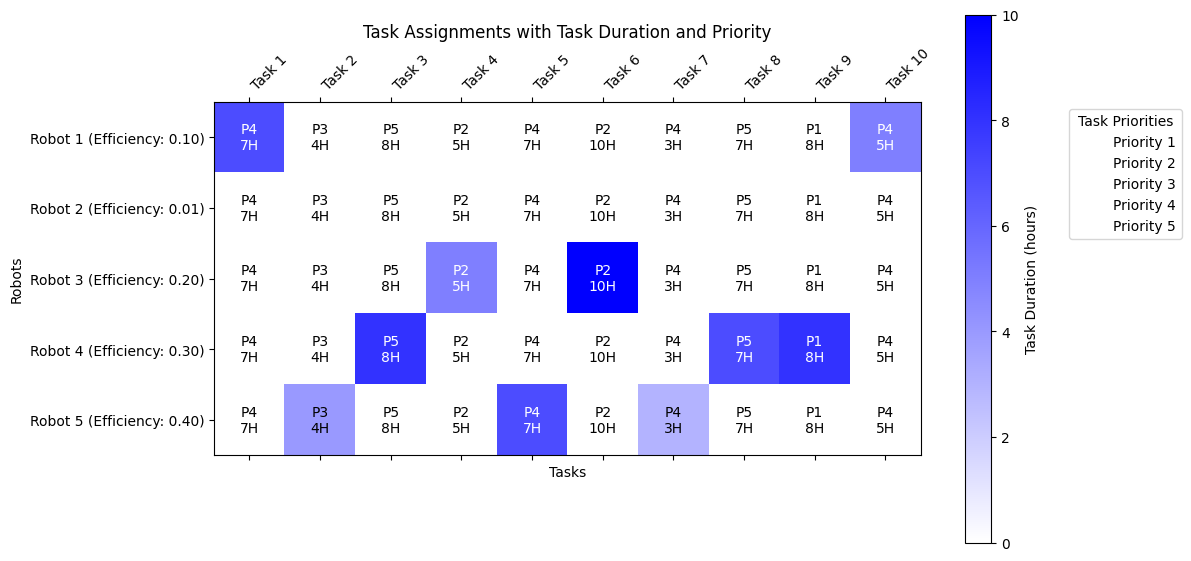

In [189]:
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    best_solution2 = run_genetic_algorithm_inverse(task_durations, task_priorities, robot_efficiencies)

    visualize_assignments_improved(best_solution2, task_durations, task_priorities, robot_efficiencies)